In [1]:
import pandas as pd
import hvplot.pandas
import pandas as pd
from scipy.stats import linregress
from matplotlib import pyplot as plt
import numpy as np

movie_data = "data/movie_dataset.csv"
read_data = pd.read_csv(movie_data)
read_data.head()

,budget,genres,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,vote_count,director
0,237000000.0,Action Adventure Fantasy Science-Fiction,19995,en,150.437577,10-12-2009,2.787965e+09,162.0,Avatar,7.2,11800,James Cameron
1,300000000.0,Adventure Fantasy Action,285,en,139.082615,19-05-2007,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Gore Verbinski
2,245000000.0,Action Adventure Crime,206647,en,107.376788,26-10-2015,8.806746e+08,148.0,Spectre,6.3,4466,Sam Mendes
3,250000000.0,Action Crime Drama Thriller,49026,en,112.312950,16-07-2012,1.084939e+09,165.0,The Dark Knight Rises,7.6,9106,Christopher Nolan
4,260000000.0,Action Adventure Science-Fiction,49529,en,43.926995,07-03-2012,2.841391e+08,132.0,John Carter,6.1,2124,Andrew Stanton


In [2]:
# Pull month from release_date
read_data["month"] = pd.to_datetime(read_data["release_date"], errors = "coerce").dt.month

# Check for rows with missing month data
read_data = read_data.dropna(subset = ["month"])

# Check months for integer value
read_data["month"] = read_data["month"].astype(int)

# Count # of movies released per month
sorted_month_count = read_data["month"].value_counts().sort_index()

# Convert month # to names
month_by_name = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Create lists for months and movie counts
months = sorted_month_count.index.tolist()
movie_counts = sorted_month_count.values.tolist()

# Set DataFrame
month_df = pd.DataFrame({
    "Month": [month_by_name[m - 1] for m in months],
    "Movies Released": movie_counts})

print("Total Movies Released by Month:")
print(month_df)

Total Movies Released by Month:
        Month  Movies Released
0     January              252
1    February              107
2       March              110
3       April              104
4         May              115
5        June              132
6        July              138
7      August              112
8   September              151
9     October              145
10   November              155
11   December              149


In [3]:
# Sort to get top 3 and bottom 3 months
top_3_months = month_df.nlargest(3, "Movies Released")
bottom_3_months = month_df.nsmallest(3, "Movies Released")

# Calculate differences in total # of movies released
month_df["Difference"] = month_df["Movies Released"].diff().abs()
greatest_difference = month_df["Difference"].max()
greatest_difference_months = month_df.iloc[month_df["Difference"].idxmax() - 1: month_df["Difference"].idxmax() + 1]

print("\nTop 3 Months with Most Movies Released:")
print(top_3_months)

print("\nBottom 3 Months with Least Movies Released:")
print(bottom_3_months)

print("\nGreatest Difference in Total Movies Released by month:")
print(greatest_difference_months)


Top 3 Months with Most Movies Released:
        Month  Movies Released
0     January              252
10   November              155
8   September              151

Bottom 3 Months with Least Movies Released:
      Month  Movies Released
3     April              104
1  February              107
2     March              110

Greatest Difference in Total Movies Released by month:
      Month  Movies Released  Difference
0   January              252         NaN
1  February              107       145.0


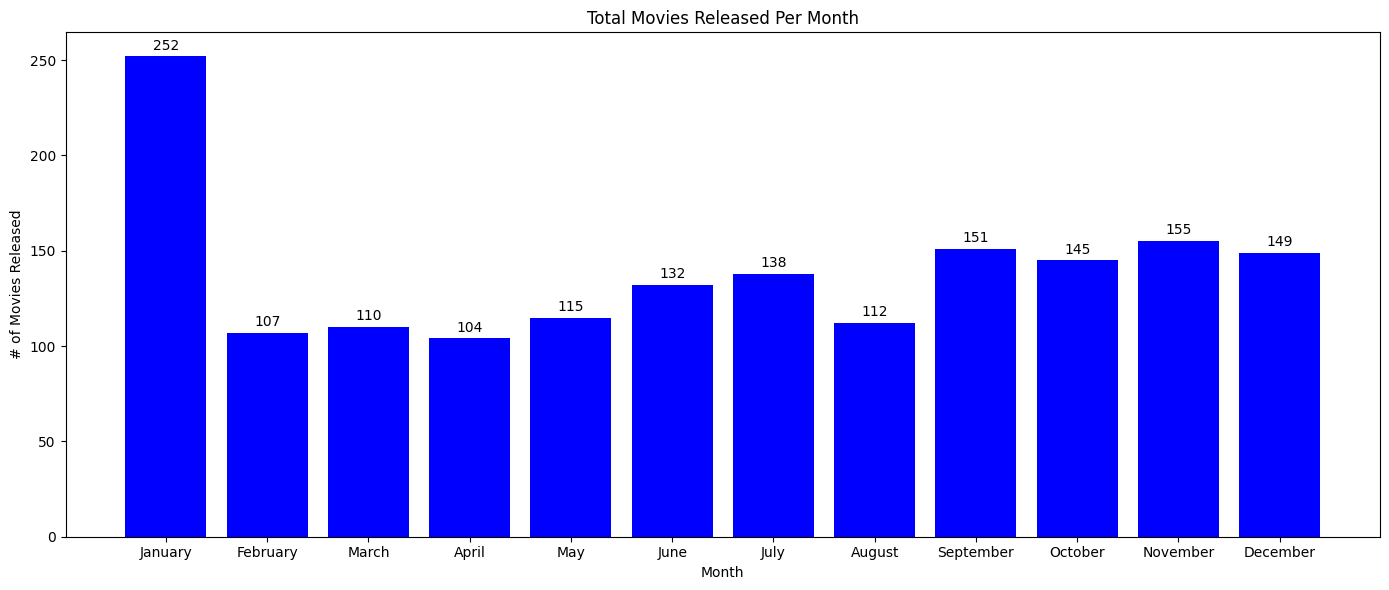

In [4]:
# Create bar chart
x_axis = np.arange(len(month_by_name))

plt.figure(figsize = (14, 6))
bars = plt.bar(x_axis, sorted_month_count, color = "blue", align = "center")

# Annotate movie totals
for bar, count in zip(bars, sorted_month_count): 
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, str(count), ha = "center", va = "bottom", fontsize = 10, color = "black")

# Set title, labels, and ticks
plt.xticks(x_axis, month_by_name)
plt.xlabel("Month")
plt.ylabel("# of Movies Released")
plt.title("Total Movies Released Per Month")

# Display plot
plt.tight_layout()
plt.show()

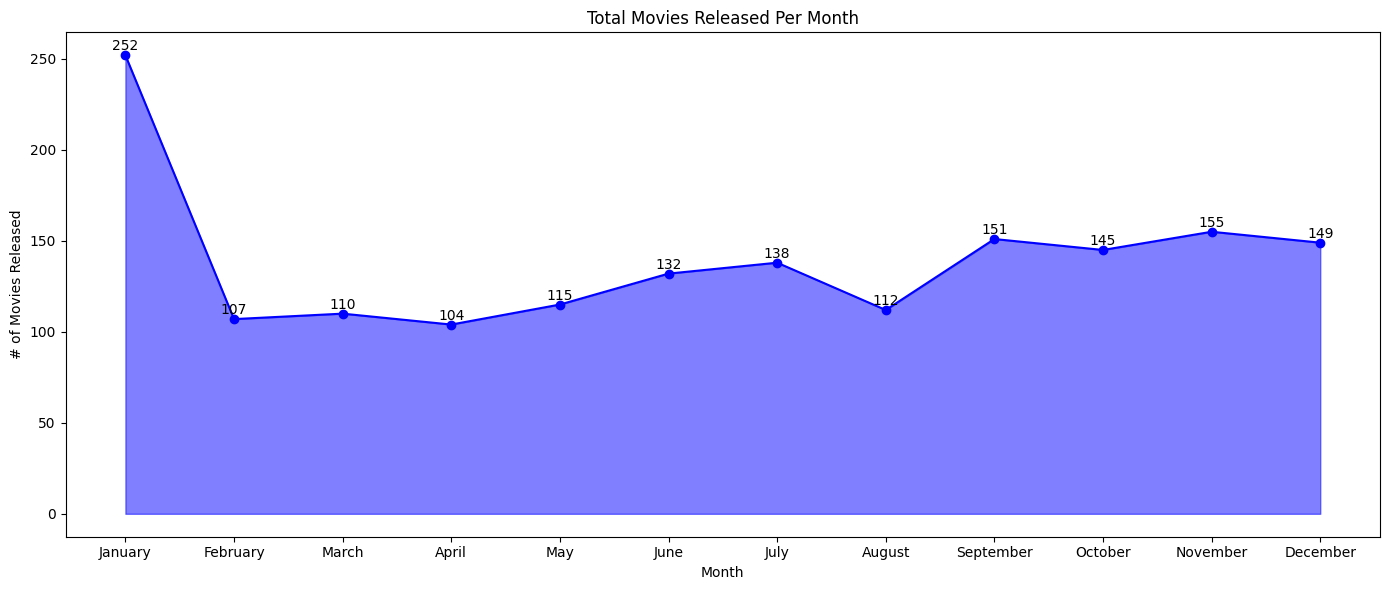

In [5]:
sorted_df = month_df.sort_index()

plt.figure(figsize = (14, 6))

# Plot filled area and line chart
plt.fill_between(sorted_df["Month"], sorted_df["Movies Released"], color = "blue", alpha = 0.5)
plt.plot(sorted_df["Month"], sorted_df["Movies Released"], color = "blue", marker = "o")

# Annotate data points
for x, y in zip(sorted_df["Month"], sorted_df["Movies Released"]): 
    plt.text(x, y + 1, str(y), ha = "center", va = "bottom", fontsize = 10, color = "black")

# Add labels, title
plt.xlabel("Month")
plt.ylabel("# of Movies Released")
plt.title("Total Movies Released Per Month")
plt.tight_layout()

plt.show()

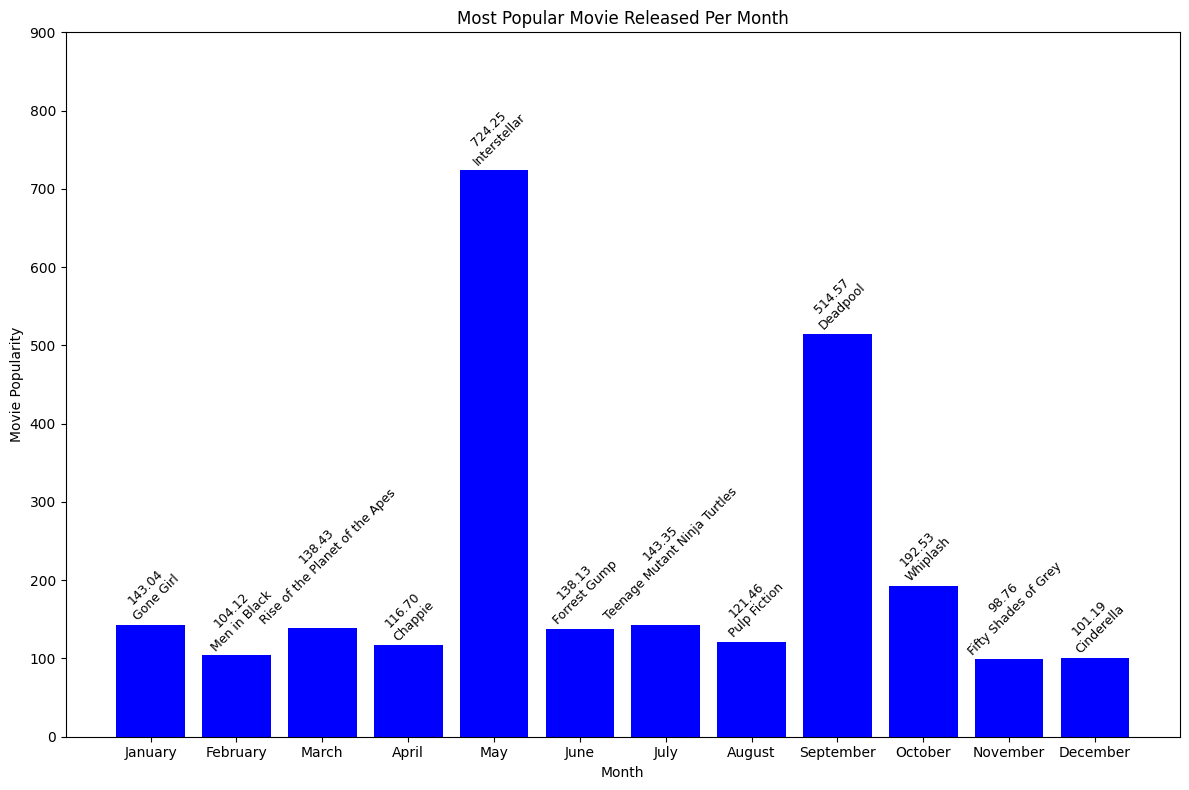

In [6]:
# Check rows for popularity missing values and ensure numeric value
read_data["popularity"] = pd.to_numeric(read_data["popularity"], errors = "coerce")
read_data = read_data.dropna(subset = ["popularity"])

# Group movies by month, get movie with highest popularity
best_movies_by_month = read_data.loc[read_data.groupby("month")["popularity"].idxmax()]

# Pull movie titles and popularity
movie_titles = best_movies_by_month["title"].tolist()
movie_popularity = best_movies_by_month["popularity"].tolist()

# Create bar chart
x_axis = np.arange(len(month_by_name))

plt.figure(figsize=(12, 8))
bars = plt.bar(x_axis, movie_popularity, color="blue", align="center")

# Annotate movie totals and popularity
for bar, count, title in zip(bars, movie_popularity, movie_titles):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, f"{count:.2f}\n{title}", ha = "center", va = "bottom", fontsize = 9, color = "black", rotation = 45)

# Set title, labels, and ticks
plt.ylim(0,900)
plt.xticks(x_axis, month_by_name)
plt.xlabel("Month")
plt.ylabel("Movie Popularity")
plt.title("Most Popular Movie Released Per Month")

plt.tight_layout()
plt.show()